In [1]:
import pandas as pd
import numpy as np

from datetime import datetime

%matplotlib inline
from matplotlib import pyplot
pd.set_option('display.max_rows', 500)

![CRISP_DM](../reports/figures/CRISP_DM.png)

# Data Preparation

* focus is always to understand the final data structure
* support each step by visual analytics

## Johns Hopkins GITHUB csv data


In [2]:
data_path='../data/raw/COVID-19/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
pd_raw=pd.read_csv(data_path)

In [3]:
pd_raw.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/13/20,8/14/20,8/15/20,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,37424,37431,37551,37596,37599,37599,37599,37856,37894,37953
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,6971,7117,7260,7380,7499,7654,7812,7967,8119,8275
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,37187,37664,38133,38583,39025,39444,39847,40258,40667,41068
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,981,989,989,989,1005,1005,1024,1024,1045,1045
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1815,1852,1879,1906,1935,1966,2015,2044,2068,2134


In [4]:
time_idx=pd_raw.columns[4:]

In [5]:
df_plot = pd.DataFrame({
    'date':time_idx})
df_plot.head()

,date
0,1/22/20
1,1/23/20
2,1/24/20
3,1/25/20
4,1/26/20


In [6]:
pd_raw['Country/Region']

0                           Afghanistan
1                               Albania
2                               Algeria
3                               Andorra
4                                Angola
5                   Antigua and Barbuda
6                             Argentina
7                               Armenia
8                             Australia
9                             Australia
10                            Australia
11                            Australia
12                            Australia
13                            Australia
14                            Australia
15                            Australia
16                              Austria
17                           Azerbaijan
18                              Bahamas
19                              Bahrain
20                           Bangladesh
21                             Barbados
22                              Belarus
23                              Belgium
24                               Belize


In [7]:
pd_raw[pd_raw['Country/Region']=='Germany'].iloc[:,4::].sum(axis=0)[0:4]

1/22/20    0
1/23/20    0
1/24/20    0
1/25/20    0
dtype: int64

In [8]:
pd_raw['Country/Region'].unique().tolist()

['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burma',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo (Brazzaville)',
 'Congo (Kinshasa)',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czechia',
 'Denmark',
 'Diamond Princess',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',

In [9]:
country_list=['India',
              'Germany',
              'US',
              'Bangladesh',
              'Korea, South',
             ] 

In [10]:
country_list = ['US', 'Brazil', 'India', 'Russia', 'Spain', 'United Kingdom', 'Italy', 'Peru', 'Iran', 'Mexico', 'France', 'Germany', 'Chile', 'South Africa', 'Turkey', 'Pakistan', 'Saudi Arabia', 'Colombia', 'China', 'Bangladesh', 'Canada', 'Argentina', 'Qatar', 'Belgium', 'Indonesia', 'Ecuador', 'Sweden', 'Iraq', 'Netherlands', 'Egypt', 'Philippines', 'Belarus', 'Ukraine', 'United Arab Emirates', 'Portugal', 'Kuwait', 'Kazakhstan', 'Singapore', 'Israel', 'Oman', 'Switzerland', 'Dominican Republic', 'Bolivia', 'Panama', 'Poland', 'Romania', 'Ireland', 'Japan', 'Bahrain', 'Afghanistan', 'Nigeria', 'Guatemala', 'Armenia', 'Austria', 'Honduras', 'Ghana', 'Serbia', 'Algeria', 'Korea, South', 'Azerbaijan', 'Morocco', 'Moldova', 'Denmark', 'Czechia', 'Kyrgyzstan', 'Australia', 'Uzbekistan', 'Cameroon', 'Nepal', 'Norway', 'Kenya', 'Venezuela', 'Malaysia', "Cote d'Ivoire", 'Ethiopia', 'El Salvador', 'Costa Rica', 'Finland', 'Sudan', 'Bosnia and Herzegovina', 'Senegal', 'Bulgaria', 'North Macedonia', 'Luxembourg', 'Congo (Kinshasa)', 'West Bank and Gaza', 'Guinea', 'Tajikistan', 'Madagascar', 'Gabon', 'Haiti', 'Hungary', 'Greece', 'Kosovo', 'Djibouti', 'Croatia', 'Thailand', 'Mauritania', 'Albania', 'Paraguay', 'Lebanon', 'Zambia', 'Central African Republic', 'Maldives', 'Cuba', 'Somalia', 'Equatorial Guinea', 'Estonia', 'Iceland', 'Lithuania', 'Slovenia', 'Slovakia', 'Sri Lanka', 'Nicaragua', 'Libya', 'Mali', 'New Zealand', 'Malawi', 'Congo (Brazzaville)', 'South Sudan', 'Guinea-Bissau', 'Tunisia', 'Zimbabwe', 'Montenegro', 'Cabo Verde', 'Latvia', 'Eswatini', 'Sierra Leone', 'Cyprus', 'Diamond Princess', 'Niger', 'Uruguay', 'Rwanda', 'Burkina Faso', 'Jordan', 'Mozambique', 'Andorra', 'Georgia', 'Benin', 'Namibia', 'Yemen', 'Malta', 'Suriname', 'San Marino', 'Uganda', 'Chad', 'Jamaica', 'Liberia', 'Togo', 'Sao Tome and Principe', 'Zambia', 'Angola', 'Tanzania', 'Vietnam', 'Syria', 'Mauritius', 'Botswana', 'Gambia', 'Bahamas', 'Burma', 'Guyana', 'Lesotho', 'Comoros', 'Trinidad and Tobago', 'Mongolia', 'Cambodia', 'Burundi', 'Brunei', 'Eritrea', 'Monaco', 'Barbados', 'Liechtenstein', 'Belize', 'Bhutan', 'Seychelles', 'Antigua and Barbuda', 'Papua New Guinea', 'Saint Vincent and the Grenadines', 'Timor-Leste', 'Grenada', 'Fiji', 'Saint Lucia', 'Laos', 'Dominica', 'Saint Kitts and Nevis', 'Holy See', 'MS Zaandam', 'Western Sahara']

In [11]:
for each in country_list:
    df_plot[each]=np.array(pd_raw[pd_raw['Country/Region']==each].iloc[:,4::].sum(axis=0))

/home/harsh/anaconda3/envs/ds/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='date'>

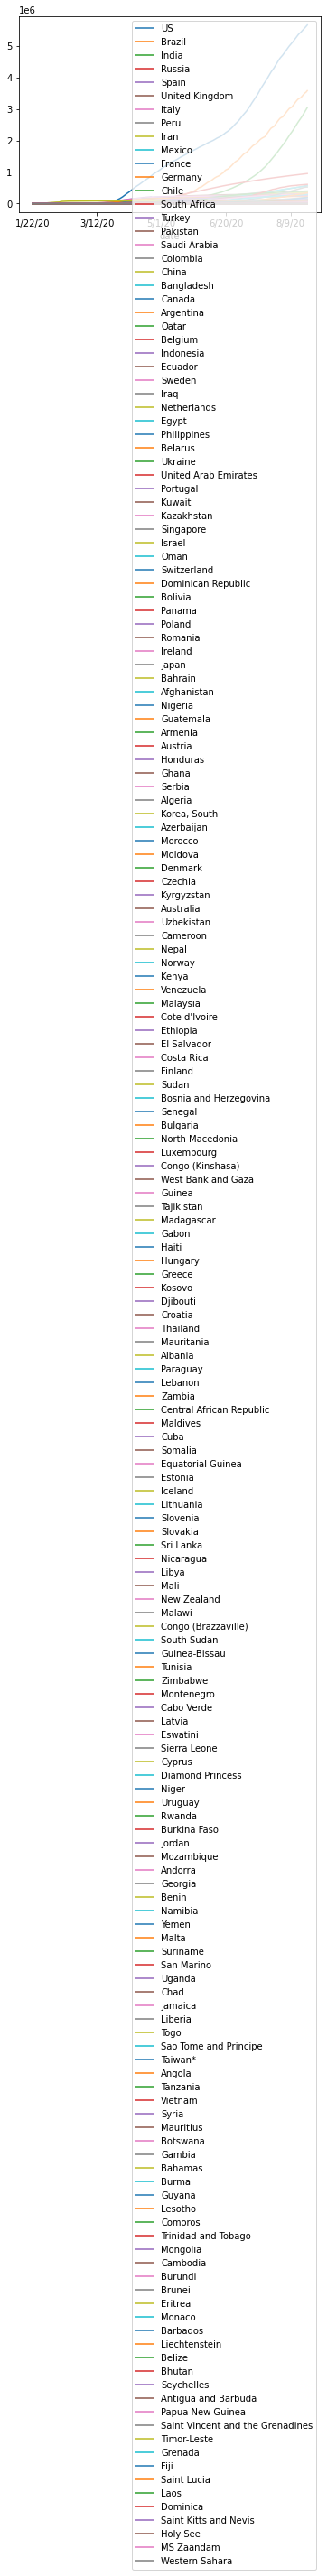

In [12]:
%matplotlib inline
df_plot.set_index('date').plot()

## Data Type Date

In [12]:
df_plot.head()

,date,US,Brazil,India,Russia,Spain,United Kingdom,Italy,Peru,Iran,...,Timor-Leste,Grenada,Fiji,Saint Lucia,Laos,Dominica,Saint Kitts and Nevis,Holy See,MS Zaandam,Western Sahara
0,1/22/20,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1/23/20,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1/24/20,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1/25/20,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1/26/20,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
time_idx=[datetime.strptime( each,"%m/%d/%y") for each in df_plot.date] # convert to datetime
time_str=[each.strftime('%Y-%m-%d') for each in time_idx] # convert back to date ISO norm (str)

In [14]:
df_plot['date']=time_idx
type(df_plot['date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [15]:
df_plot.head()

,date,US,Brazil,India,Russia,Spain,United Kingdom,Italy,Peru,Iran,...,Timor-Leste,Grenada,Fiji,Saint Lucia,Laos,Dominica,Saint Kitts and Nevis,Holy See,MS Zaandam,Western Sahara
0,2020-01-22,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2020-01-23,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2020-01-24,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2020-01-25,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2020-01-26,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
df_plot.to_csv('../data/processed/COVID_small_flat_table_1.csv',sep=';',index=False)

## Relational data model - defining a primary key

In the relational model of databases, a primary key is a specific choice of a minimal set of attributes (columns) that uniquely specify a tuple (row) in a relation (table) (source: wiki)


A primary key’s main features are:

* It must contain a unique value for each row of data.
* It cannot contain null values.

In [67]:
data_path='../data/raw/COVID-19/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
pd_raw=pd.read_csv(data_path)
pd_raw.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/13/20,8/14/20,8/15/20,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,37424,37431,37551,37596,37599,37599,37599,37856,37894,37953
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,6971,7117,7260,7380,7499,7654,7812,7967,8119,8275
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,37187,37664,38133,38583,39025,39444,39847,40258,40667,41068
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,981,989,989,989,1005,1005,1024,1024,1045,1045
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1815,1852,1879,1906,1935,1966,2015,2044,2068,2134


In [68]:
pd_data_base=pd_raw.rename(columns={'Country/Region':'country',
                      'Province/State':'state'})
pd_data_base['state']=pd_data_base['state'].fillna('no')  #ensure a sring, important for indexing

In [69]:
pd_data_base=pd_data_base.drop(['Lat','Long'],axis=1)
pd_data_base.head()

,state,country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,8/13/20,8/14/20,8/15/20,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20
0,no,Afghanistan,0,0,0,0,0,0,0,0,...,37424,37431,37551,37596,37599,37599,37599,37856,37894,37953
1,no,Albania,0,0,0,0,0,0,0,0,...,6971,7117,7260,7380,7499,7654,7812,7967,8119,8275
2,no,Algeria,0,0,0,0,0,0,0,0,...,37187,37664,38133,38583,39025,39444,39847,40258,40667,41068
3,no,Andorra,0,0,0,0,0,0,0,0,...,981,989,989,989,1005,1005,1024,1024,1045,1045
4,no,Angola,0,0,0,0,0,0,0,0,...,1815,1852,1879,1906,1935,1966,2015,2044,2068,2134


In [70]:
pd_relational_model=pd_data_base.set_index(['state','country']) \
                                .T                              \
                                .stack(level=[0,1])             \
                                .reset_index()                  \
                                .rename(columns={'level_0':'date',
                                                   0:'confirmed'},
                                                  )
pd_relational_model.head()


,date,state,country,confirmed
0,1/22/20,Alberta,Canada,0.0
1,1/22/20,Anguilla,United Kingdom,0.0
2,1/22/20,Anhui,China,1.0
3,1/22/20,Aruba,Netherlands,0.0
4,1/22/20,Australian Capital Territory,Australia,0.0


In [71]:
pd_relational_model.dtypes

date          object
state         object
country       object
confirmed    float64
dtype: object

In [72]:
pd_relational_model['date']=pd_relational_model.date.astype('datetime64[ns]')

In [73]:
pd_relational_model.dtypes

date         datetime64[ns]
state                object
country              object
confirmed           float64
dtype: object

In [74]:
pd_relational_model.confirmed=pd_relational_model.confirmed.astype(int)

pd_relational_model.to_csv('../data/processed/COVID_relational_confirmed.csv',sep=';',index=False)

In [75]:
print(pd_relational_model[pd_relational_model['country']=='US'].tail())

            date state country  confirmed
55846 2020-08-18    no      US    5482416
56112 2020-08-19    no      US    5529824
56378 2020-08-20    no      US    5573847
56644 2020-08-21    no      US    5622540
56910 2020-08-22    no      US    5667112


## Attention due to the new structure of the Johns Hopkins data set the state information US is in a second file

In [76]:
data_path='../data/raw/COVID-19/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv'
pd_raw_US=pd.read_csv(data_path)
pd_raw_US.head()



,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,8/13/20,8/14/20,8/15/20,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,...,1196,1196,1206,1218,1219,1235,1241,1240,1255,1264
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,...,3744,3791,3839,3877,3888,3906,3931,3957,3997,4037
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,...,586,590,598,604,605,606,613,619,622,626
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,...,457,465,469,469,474,476,490,494,501,503
4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,...,835,848,854,860,863,887,901,912,930,931


In [77]:
# drop all non relevant fields! 
# Many of this fields do not belong to 
# a transactional data. These fields belong to so called master data
pd_raw_US=pd_raw_US.drop(['UID', 'iso2', 'iso3', 'code3', 'Country_Region','FIPS', 'Admin2',  'Lat', 'Long_', 'Combined_Key'],axis=1)
pd_data_base_US=pd_raw_US.rename(columns={'Province_State':'state'}).copy()


In [78]:
## the stack command has problems when only one information is available within a stacking level
pd_relational_model_US=pd_data_base_US.set_index(['state']) \
                                .T                              \
                                .stack()             \
                                .reset_index()                  \
                                .rename(columns={'level_0':'date',
                                                   0:'confirmed'},
                                                  )
pd_relational_model_US['country']='US'
pd_relational_model_US['date']=[datetime.strptime( each,"%m/%d/%y") for each in pd_relational_model_US.date] # convert to datetime
pd_relational_model_US.head()

,date,state,confirmed,country
0,2020-01-22,Alabama,0,US
1,2020-01-22,Alabama,0,US
2,2020-01-22,Alabama,0,US
3,2020-01-22,Alabama,0,US
4,2020-01-22,Alabama,0,US


In [79]:
# update the large relational file

In [80]:
pd_relational_model_all=pd_relational_model[pd_relational_model['country']!='US'].reset_index(drop=True)

In [81]:
pd_relational_model_all=pd.concat([pd_relational_model_all,pd_relational_model_US],ignore_index=True)

/home/harsh/.local/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [82]:
pd_relational_model_all.to_csv('../data/processed/20200424_COVID_relational_confirmed.csv',sep=';',index=False)

In [83]:
print(pd_relational_model_all[pd_relational_model_all['country']=='India'])

       confirmed country       date state
157            0   India 2020-01-22    no
422            0   India 2020-01-23    no
687            0   India 2020-01-24    no
952            0   India 2020-01-25    no
1217           0   India 2020-01-26    no
1482           0   India 2020-01-27    no
1747           0   India 2020-01-28    no
2012           0   India 2020-01-29    no
2277           1   India 2020-01-30    no
2542           1   India 2020-01-31    no
2807           1   India 2020-02-01    no
3072           2   India 2020-02-02    no
3337           3   India 2020-02-03    no
3602           3   India 2020-02-04    no
3867           3   India 2020-02-05    no
4132           3   India 2020-02-06    no
4397           3   India 2020-02-07    no
4662           3   India 2020-02-08    no
4927           3   India 2020-02-09    no
5192           3   India 2020-02-10    no
5457           3   India 2020-02-11    no
5722           3   India 2020-02-12    no
5987           3   India 2020-02-1

### cross check on full sum US data

In [84]:
check_US=pd_relational_model_all[pd_relational_model_all['country']=='US']

In [85]:

check_US[['date','country','confirmed']].groupby(['date','country']).sum()

,,confirmed
date,country,
2020-01-22,US,1
2020-01-23,US,1
2020-01-24,US,2
2020-01-25,US,2
2020-01-26,US,5
2020-01-27,US,5
2020-01-28,US,5
2020-01-29,US,5
2020-01-30,US,5
